In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt 

In [ ]:
np.random.seed(121)
X = np.linspace(-1,1,200)
np.random.shuffle(X)
Y = 2*X +np.random.randn(*X.shape) * 0.33

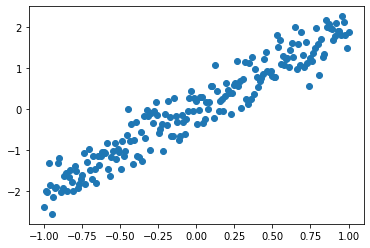

In [ ]:
plt.scatter(X,Y)

In [ ]:
#split data
x_train ,y_train = X[:160],Y[:160]
x_test , y_test = X[160:],Y[160:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160,)
(160,)
(40,)
(40,)


In [ ]:
#Create a Neural Network Model

model = Sequential()
model.add(Dense(units=1,input_dim=1,kernel_initializer='uniform',activation='linear'))

model.compile(loss="mse" , optimizer="sgd")

In [ ]:
# print initial weights
weights = model.layers[0].get_weights()
print(weights)
w_init = weights[0][0][0]
print(f"initial weight : {w_init}")
b_init=weights[1][0]
print(f"initial bias : {b_init}")

[array([[0.02728696]], dtype=float32), array([0.], dtype=float32)]
initial weight : 0.027286957949399948
initial bias : 0.0


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model

model.fit(x_train,y_train,epochs=100,verbose=1)

Epoch 1/100
160/160 [==============================] - 0s 1ms/step - loss: 1.4818
Epoch 2/100
160/160 [==============================] - 0s 51us/step - loss: 1.3872
Epoch 3/100
160/160 [==============================] - 0s 52us/step - loss: 1.3001
Epoch 4/100
160/160 [==============================] - 0s 39us/step - loss: 1.2184
Epoch 5/100
160/160 [==============================] - 0s 43us/step - loss: 1.1427
Epoch 6/100
160/160 [==============================] - 0s 42us/step - loss: 1.0728
Epoch 7/100
160/160 [==============================] - 0s 41us/step - loss: 1.0074
Epoch 8/100
160/160 [==============================] - 0s 58us/step - loss: 0.9471
Epoch 9/100
160/160 [==============================] - 0s 44us/step - loss: 0.8898
Epoch 10/100
160/160 [==============================] - 0s 52us/step - loss: 0.8369
Epoch 11/100
160/160 [==============================] - 0s 42us/step - loss: 0.7881
Epoch 12/100
160/160 [==============================] - 0s 45us/step - loss: 0.7430
Ep

In [ ]:
#evaluate model

cost = model.evaluate(x_test,y_test)
cost


40/40 [==============================] - 0s 75us/step


0.14208754897117615

In [ ]:
final_weights = model.layers[0].get_weights()
print(final_weights)
w,b = final_weights[0][0][0],final_weights[1][0]
print(w,b)

[array([[1.982914]], dtype=float32), array([-0.0124623], dtype=float32)]
1.982914 -0.012462304


In [ ]:
#prediction
pred = w*x_test +b
pred

array([-1.67651574, -0.24164332,  0.47579289, -1.91566114,  1.27294424,
       -1.39751277,  0.35622019, -0.48078872, -0.2615721 , -1.7163733 ,
       -0.36121602, -0.64021899,  0.61529438, -1.79608844, -0.97900831,
        0.39607776,  0.81458222, -0.12207061,  0.31636263, -0.89929318,
       -1.17829615,  0.09714601, -1.57687182, -1.21815371, -0.5007175 ,
       -0.85943561, -0.95907953, -1.93558992, -0.91922196, -0.79964926,
        1.89073653, -1.31779763, -1.07865223, -0.08221305, -0.34128723,
        1.59180478, -0.70000534, -0.10214183, -1.83594601, -0.68007656])

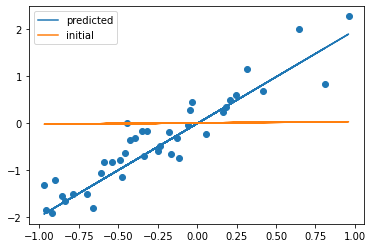

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,pred,label="predicted")
plt.plot(x_test,w_init*x_test+b_init,label='initial')
plt.legend()
plt.show()